In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
df = pd.read_csv("dataset.csv")

# Step 1: Convert complex received_signal into real-valued features
def process_complex_values(received_signal):
    real_values = np.real(received_signal)
    imag_values = np.imag(received_signal)
    magnitude = np.abs(received_signal)
    phase = np.angle(received_signal)
    
    return real_values, imag_values, magnitude, phase

# Assuming 'received_signal' column contains a list of 208 complex values per row
df['received_signal'] = df['received_signal'].apply(lambda x: np.array(eval(x)))

df_real, df_imag, df_magnitude, df_phase = zip(*df['received_signal'].map(process_complex_values))

# Convert arrays to dataframe columns
df_real = pd.DataFrame(df_real, columns=[f"real_{i}" for i in range(208)])
df_imag = pd.DataFrame(df_imag, columns=[f"imag_{i}" for i in range(208)])
df_magnitude = pd.DataFrame(df_magnitude, columns=[f"magnitude_{i}" for i in range(208)])
df_phase = pd.DataFrame(df_phase, columns=[f"phase_{i}" for i in range(208)])

# Concatenate processed signal data
df_processed = pd.concat([df_real, df_imag, df_magnitude, df_phase], axis=1)

# Step 2: Add secret_code values
df_secret_code = df["secret_code"].apply(lambda x: np.array(eval(x)))
df_secret_code = pd.DataFrame(df_secret_code.tolist(), columns=[f"secret_{i}" for i in range(13)])

# Step 3: Normalize features
scaler_real = StandardScaler()
scaler_mag = MinMaxScaler()

df_processed[df_real.columns] = scaler_real.fit_transform(df_real)
df_processed[df_magnitude.columns] = scaler_mag.fit_transform(df_magnitude)

df_secret_code = MinMaxScaler().fit_transform(df_secret_code)

# Step 4: Add target variables
df_targets = df[["jet1_x", "jet1_y", "jet1_z", "jet2_x", "jet2_y", "jet2_z"]]

# Combine all features
df_final = pd.concat([df_processed, pd.DataFrame(df_secret_code, columns=[f"secret_{i}" for i in range(13)]), df_targets], axis=1)

# Save preprocessed data
df_final.to_csv("processed_dataset.csv", index=False)

print("Preprocessing complete. Saved as processed_dataset.csv")


Preprocessing complete. Saved as processed_dataset.csv


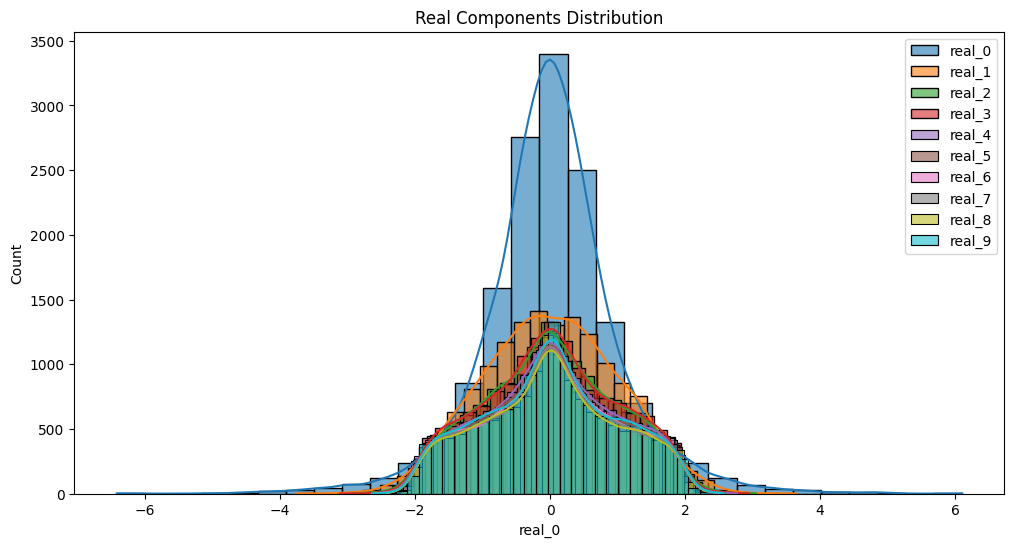

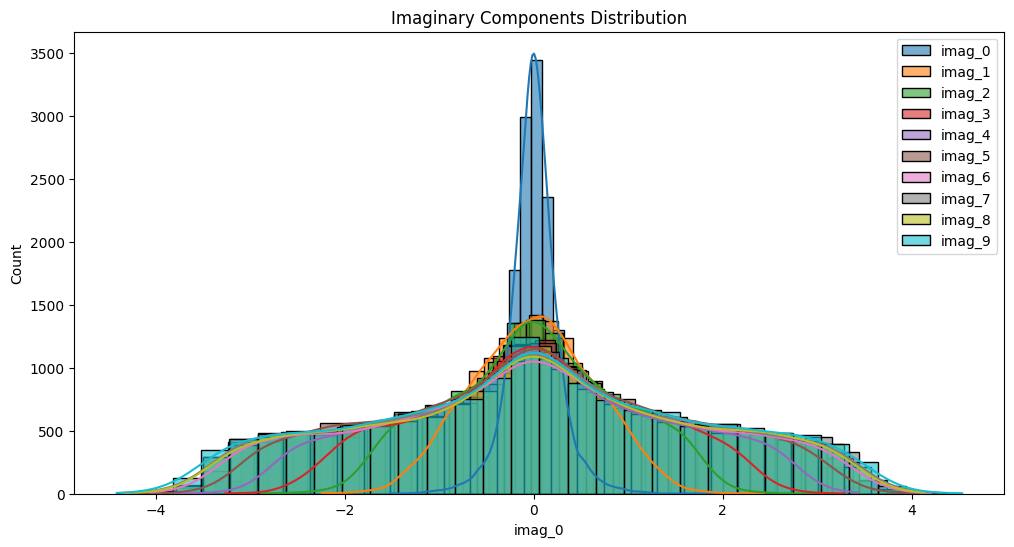

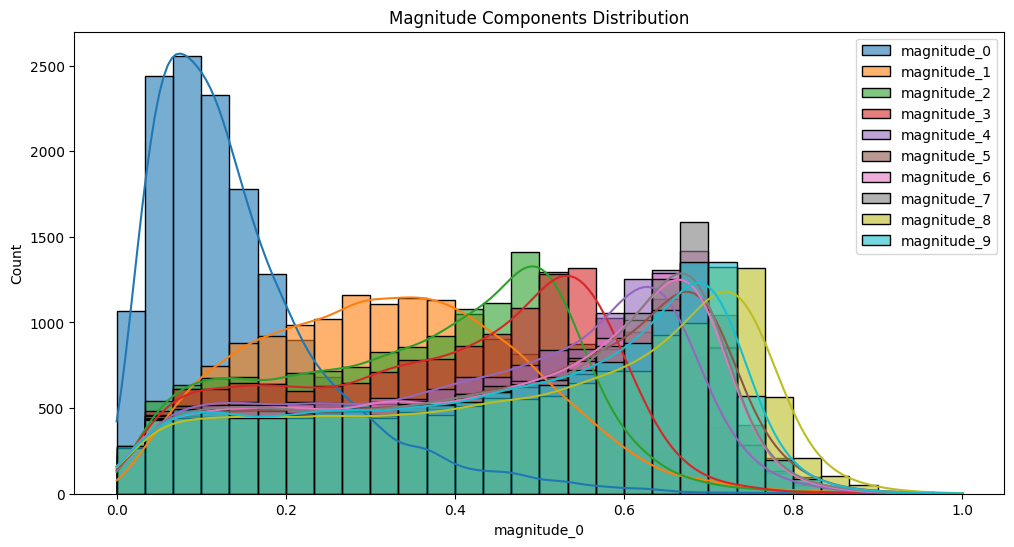

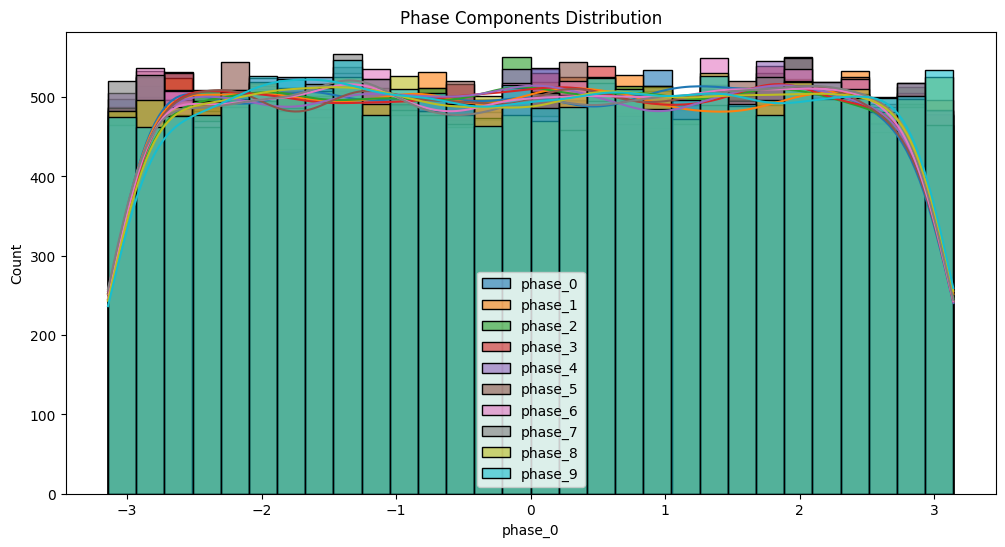

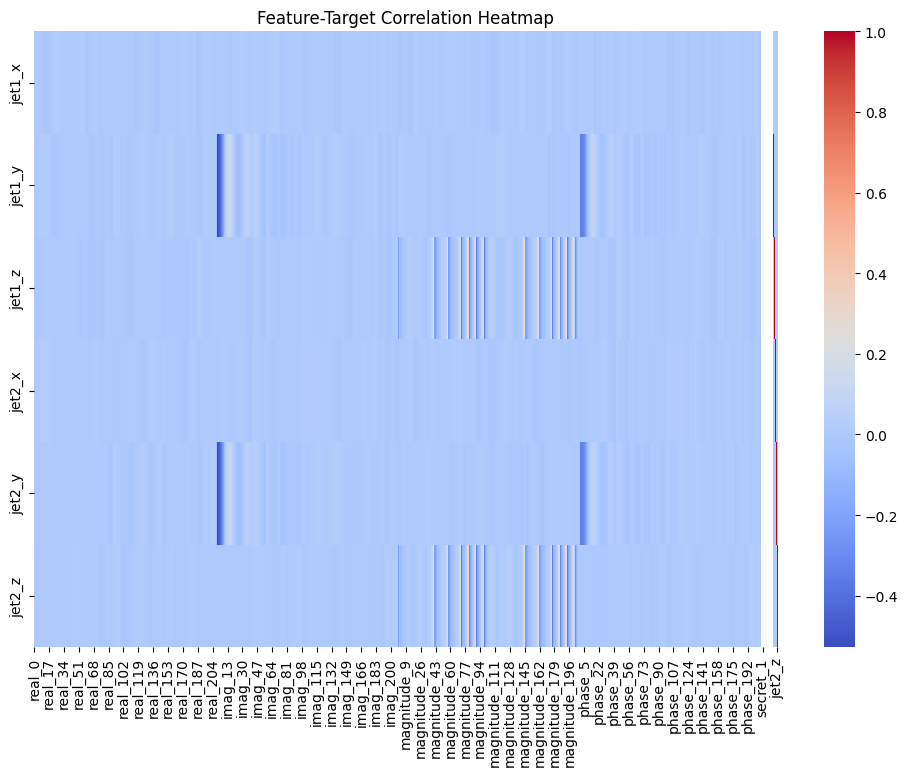

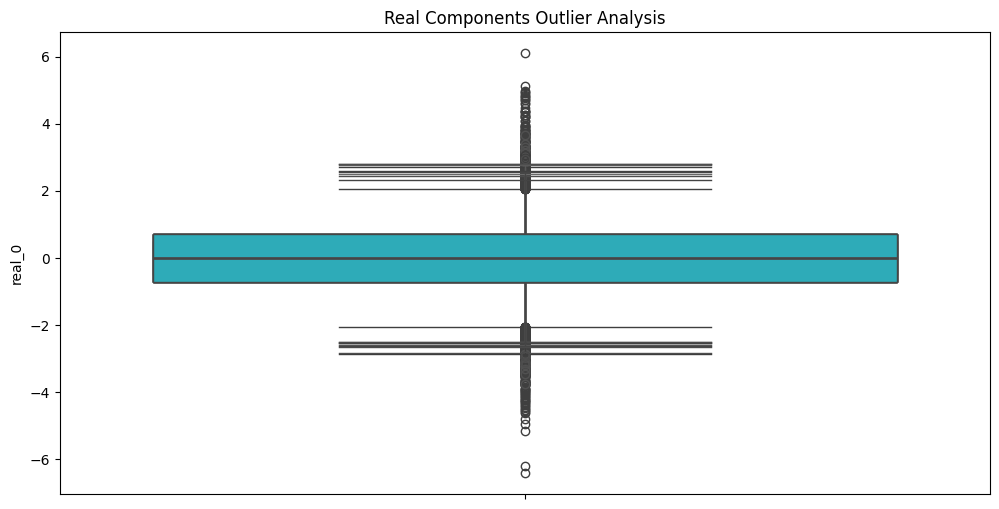

Top 20 correlated features with target variables:
 jet1_x           0.172627
jet2_z           0.172547
jet1_z           0.171888
jet2_y           0.171009
jet2_x           0.170668
jet1_y           0.168017
magnitude_98     0.126235
magnitude_193    0.111219
magnitude_72     0.110958
magnitude_176    0.109165
magnitude_81     0.107604
magnitude_89     0.107024
magnitude_185    0.105708
magnitude_41     0.090584
magnitude_145    0.087601
magnitude_161    0.082945
magnitude_57     0.078334
magnitude_201    0.075975
magnitude_71     0.072781
magnitude_184    0.067982
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
df = pd.read_csv("processed_dataset.csv")

### Step 1: Feature Distributions
def plot_histograms(data, columns, title="Feature Distributions"):
    plt.figure(figsize=(12, 6))
    for col in columns[:10]:  # Plot first 10 features for readability
        sns.histplot(data[col], kde=True, alpha=0.6, bins=30, label=col)
    plt.legend()
    plt.title(title)
    plt.show()

# Plot distributions for real, imaginary, magnitude, and phase components
plot_histograms(df, [f"real_{i}" for i in range(208)], title="Real Components Distribution")
plot_histograms(df, [f"imag_{i}" for i in range(208)], title="Imaginary Components Distribution")
plot_histograms(df, [f"magnitude_{i}" for i in range(208)], title="Magnitude Components Distribution")
plot_histograms(df, [f"phase_{i}" for i in range(208)], title="Phase Components Distribution")

### Step 2: Correlation Analysis
# Compute correlations between features and target values
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.iloc[-6:, :], cmap="coolwarm", annot=False)
plt.title("Feature-Target Correlation Heatmap")
plt.show()

### Step 3: Outlier Detection
def plot_boxplots(data, columns, title="Outlier Detection"):
    plt.figure(figsize=(12, 6))
    for col in columns[:10]:  # Plot first 10 features for readability
        sns.boxplot(data[col])
    plt.title(title)
    plt.show()

# Check for outliers in real components
plot_boxplots(df, [f"real_{i}" for i in range(208)], title="Real Components Outlier Analysis")

### Step : Feature Selection
# Identify top correlated features with targets
corr_with_targets = correlation_matrix.iloc[-6:, :].mean(axis=0).sort_values(ascending=False)[:20]
print("Top 20 correlated features with target variables:\n", corr_with_targets)



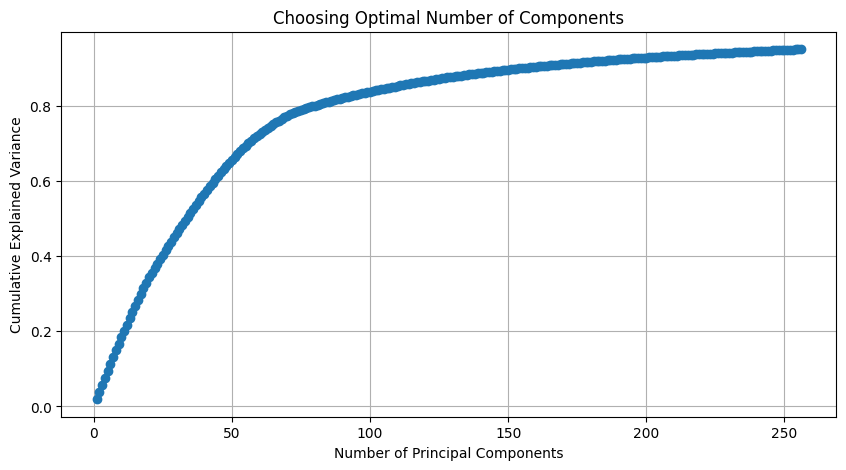

PCA applied! Reduced to 256 dimensions.


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the processed dataset
df = pd.read_csv("processed_dataset.csv")

# Separate features and targets
X = df.drop(columns=["jet1_x", "jet1_y", "jet1_z", "jet2_x", "jet2_y", "jet2_z"])
y = df[["jet1_x", "jet1_y", "jet1_z", "jet2_x", "jet2_y", "jet2_z"]]

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% variance
X_pca = pca.fit_transform(X_scaled)

# Explained variance plot
plt.figure(figsize=(10,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing Optimal Number of Components")
plt.grid(True)
plt.show()

# Save the PCA-transformed dataset
df_pca = pd.DataFrame(X_pca)
df_pca.to_csv("pca_selected_features.csv", index=False)

print(f"PCA applied! Reduced to {X_pca.shape[1]} dimensions.")


In [2]:
print(df.columns)  # This will list all column names


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '246', '247', '248', '249', '250', '251', '252', '253', '254', '255'],
      dtype='object', length=256)


<Figure size 1000x500 with 0 Axes>

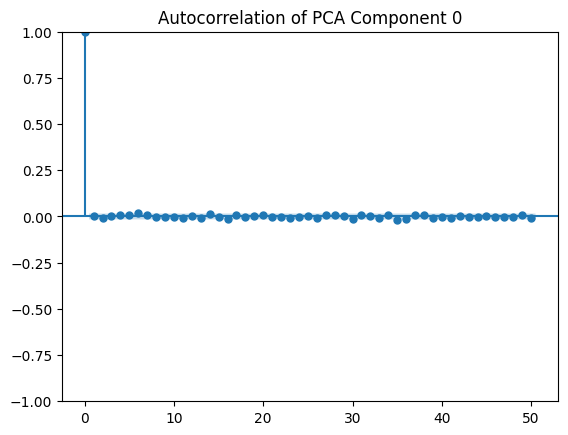

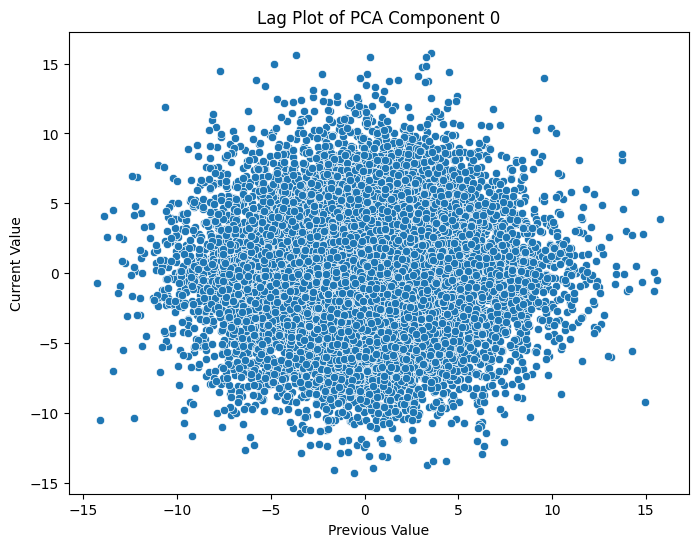

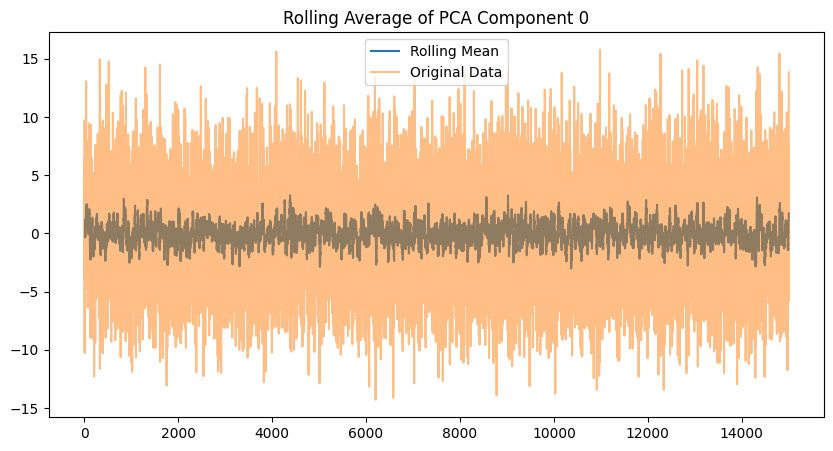

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

# Load PCA-reduced dataset
df = pd.read_csv("pca_selected_features.csv")

# Select a high-variance PCA component (e.g., first component)
feature_index = 0  # Change index if needed
feature = df[str(feature_index)]

# Autocorrelation Plot (to detect sequential dependencies)
plt.figure(figsize=(10,5))
plot_acf(feature, lags=50)
plt.title(f"Autocorrelation of PCA Component {feature_index}")
plt.show()

# Lag Plots (to see past vs. current values)
plt.figure(figsize=(8,6))
sns.scatterplot(x=feature.shift(1), y=feature)
plt.xlabel("Previous Value")
plt.ylabel("Current Value")
plt.title(f"Lag Plot of PCA Component {feature_index}")
plt.show()

# Rolling Mean (to observe trends)
df["Rolling Mean"] = feature.rolling(window=20).mean()
plt.figure(figsize=(10,5))
plt.plot(df["Rolling Mean"], label="Rolling Mean")
plt.plot(feature, alpha=0.5, label="Original Data")
plt.legend()
plt.title(f"Rolling Average of PCA Component {feature_index}")
plt.show()


In [6]:
df_cleaned = df.dropna()  # Removes rows containing NaN values
X_tsne = tsne.fit_transform(df_cleaned)


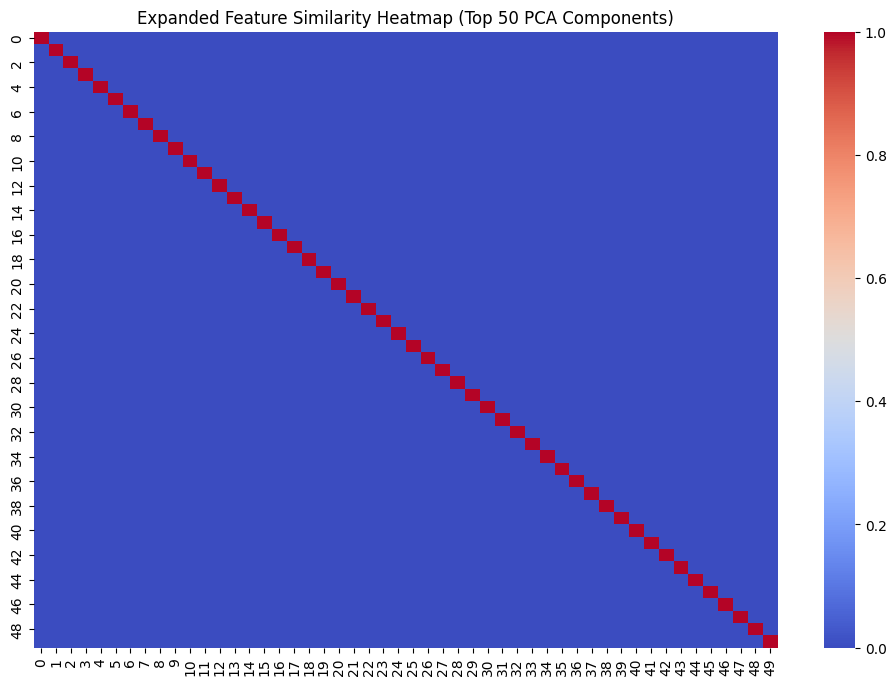

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load PCA-reduced dataset
df = pd.read_csv("pca_selected_features.csv")

# Compute correlation heatmap for top 50 components
plt.figure(figsize=(12,8))
sns.heatmap(df.iloc[:, :50].corr(), cmap="coolwarm", annot=False)  # Adjust number of components if needed
plt.title("Expanded Feature Similarity Heatmap (Top 50 PCA Components)")
plt.show()


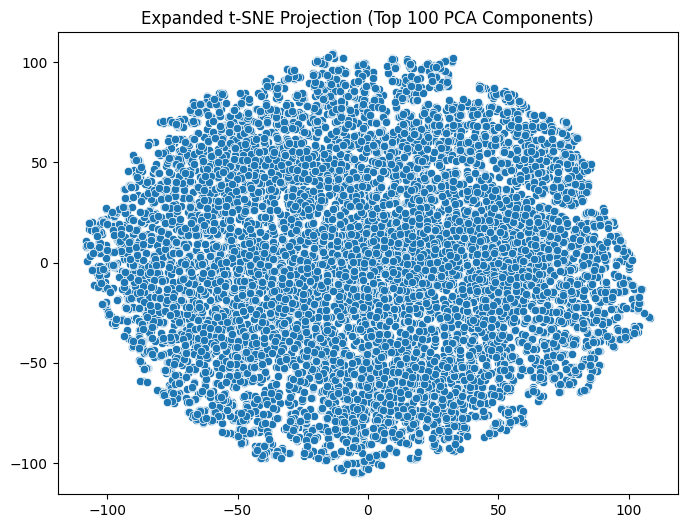

In [10]:
from sklearn.manifold import TSNE

# Reduce dataset for t-SNE visualization (Select top 100 PCA components for deeper clustering)
X_tsne = TSNE(n_components=2, perplexity=40).fit_transform(df.iloc[:, :100])  # Adjust component range if needed

# Scatter plot for t-SNE clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1])
plt.title("Expanded t-SNE Projection (Top 100 PCA Components)")
plt.show()


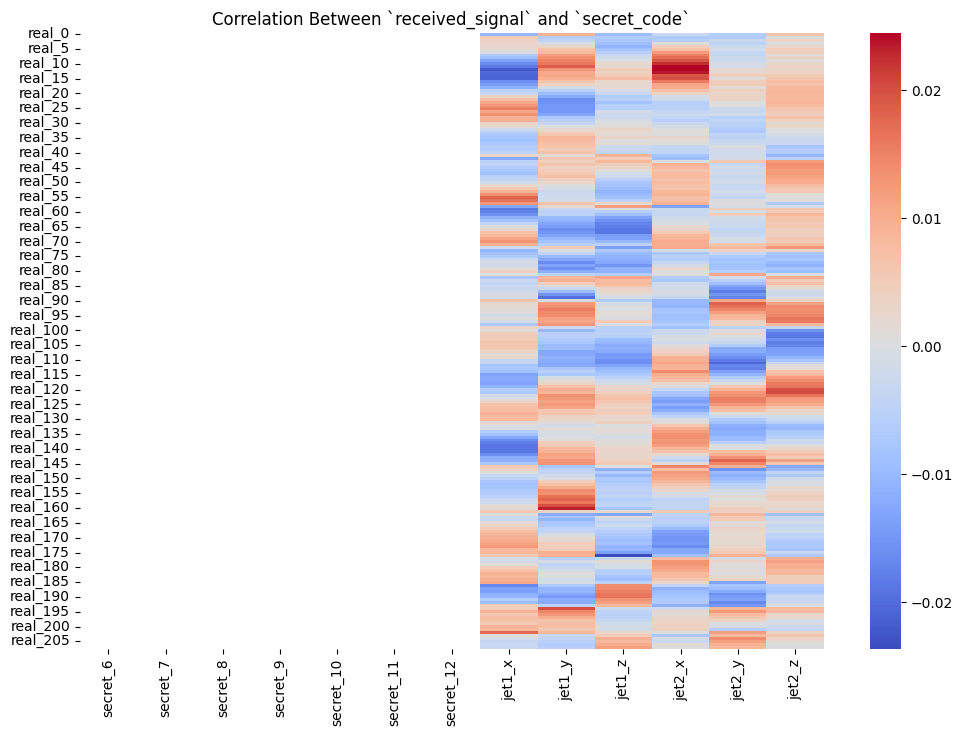

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("processed_dataset.csv")

# Compute correlation between received_signal and secret_code
correlation_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix.iloc[:208, -13:], cmap="coolwarm", annot=False)  # Adjust based on actual feature indices
plt.title("Correlation Between `received_signal` and `secret_code`")
plt.show()


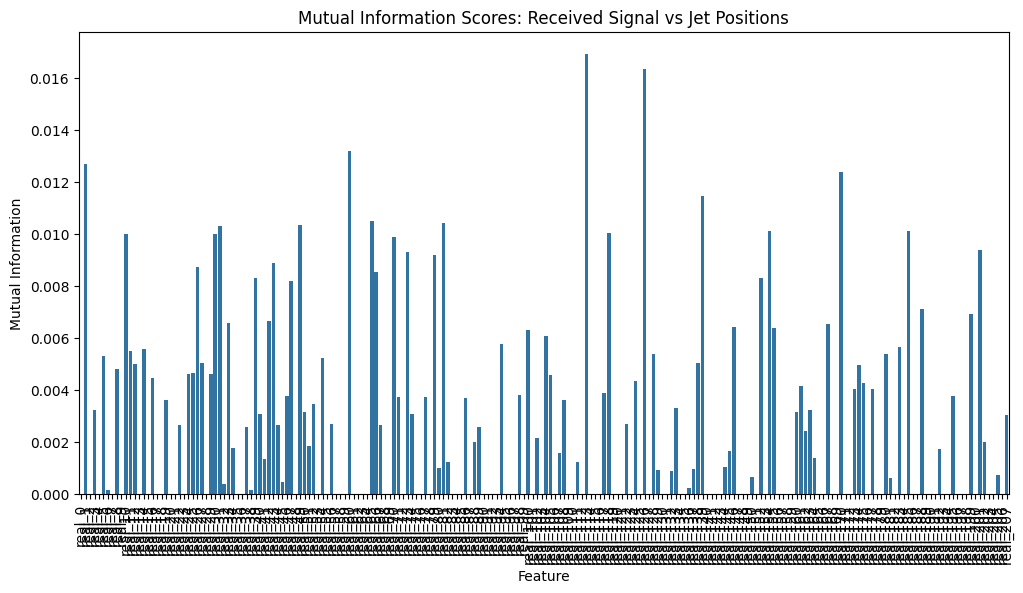

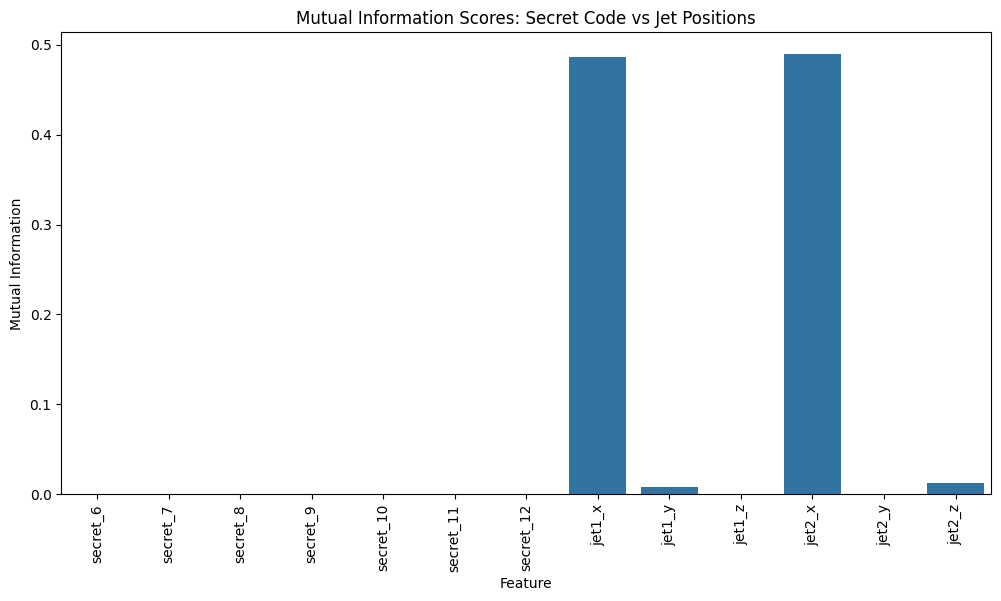

In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("processed_dataset.csv")

# Separate features and targets
X_signal = df.iloc[:, :208]  # First 208 columns (received_signal)
X_secret = df.iloc[:, -13:]  # Last 13 columns (secret_code)
y_target = df[["jet1_x", "jet1_y", "jet1_z", "jet2_x", "jet2_y", "jet2_z"]]

# Compute Mutual Information Scores
mi_signal = mutual_info_regression(X_signal, y_target.mean(axis=1))  # Mean target value
mi_secret = mutual_info_regression(X_secret, y_target.mean(axis=1))

# Convert to DataFrame for visualization
mi_df = pd.DataFrame({"Feature": X_signal.columns, "Mutual Information": mi_signal})
mi_df_secret = pd.DataFrame({"Feature": X_secret.columns, "Mutual Information": mi_secret})

# Plot results
plt.figure(figsize=(12,6))
sns.barplot(x=mi_df["Feature"], y=mi_df["Mutual Information"])
plt.xticks(rotation=90)
plt.title("Mutual Information Scores: Received Signal vs Jet Positions")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x=mi_df_secret["Feature"], y=mi_df_secret["Mutual Information"])
plt.xticks(rotation=90)
plt.title("Mutual Information Scores: Secret Code vs Jet Positions")
plt.show()


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, PowerTransformer
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("processed_dataset.csv")

# Select secret_code features
X_secret = df.iloc[:, -13:]  # Assuming last 13 columns represent secret_code

# Apply Polynomial Transformation (degree 2)
poly = PolynomialFeatures(degree=2, interaction_only=False)
X_poly = poly.fit_transform(X_secret)

# Apply Log Transformation (for skewed distributions)
X_log = np.log1p(X_secret)

# Standard Scaling (for consistency across features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_secret)

# Dimensionality Reduction (PCA)
pca = PCA(n_components=5)  # Keep top 5 components
X_pca = pca.fit_transform(X_secret)

# Convert to DataFrame and save for evaluation
df_transformed = pd.DataFrame(X_poly)
df_transformed.to_csv("transformed_secret_code.csv", index=False)


c:\Users\priks\anaconda3\envs\health\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [14]:
print(df.iloc[:, -13:].describe())  # Summary statistics for secret_code features


       secret_6  secret_7  secret_8  secret_9  secret_10  secret_11  \
count   15000.0   15000.0   15000.0   15000.0    15000.0    15000.0   
mean        0.0       0.0       0.0       0.0        0.0        0.0   
std         0.0       0.0       0.0       0.0        0.0        0.0   
min         0.0       0.0       0.0       0.0        0.0        0.0   
25%         0.0       0.0       0.0       0.0        0.0        0.0   
50%         0.0       0.0       0.0       0.0        0.0        0.0   
75%         0.0       0.0       0.0       0.0        0.0        0.0   
max         0.0       0.0       0.0       0.0        0.0        0.0   

       secret_12        jet1_x        jet1_y        jet1_z        jet2_x  \
count    15000.0  15000.000000  15000.000000  15000.000000  15000.000000   
mean         0.0    404.286653      3.130816     -0.001971   -154.683457   
std          0.0  28819.249869      1.812451      0.288930  28782.594849   
min          0.0 -49995.096880      0.001122     -0.4999

In [36]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Load dataset
df = pd.read_csv("processed_dataset.csv")

# Drop constant secret_code features (since they are all zero)
df_filtered = df.drop(columns=["secret_6", "secret_7", "secret_8", "secret_9", "secret_10", "secret_11", "secret_12"])

# Apply variance threshold to remove low-variance features
selector = VarianceThreshold(threshold=0.0001)  # Adjust threshold if needed
df_selected = df_filtered.iloc[:, :-6]  # Keep jet position features
df_selected = pd.DataFrame(selector.fit_transform(df_selected), columns=df_selected.columns[selector.get_support()])

# Save the refined dataset
df_selected.to_csv("filtered_dataset.csv", index=False)

print("Non-contributing features removed successfully! Dataset is now optimized for modeling.")


Non-contributing features removed successfully! Dataset is now optimized for modeling.


In [21]:
df.rename(columns={'JetX1': 'jet1_x', 'JetY1': 'jet1_y', 'JetZ1': 'jet1_z', 
                   'JetX2': 'jet2_x', 'JetY2': 'jet2_y', 'JetZ2': 'jet2_z'}, inplace=True)


In [22]:
print(df.columns)  # This will show available column names


Index(['real_0', 'real_1', 'real_2', 'real_3', 'real_4', 'real_5', 'real_6',
       'real_7', 'real_8', 'real_9',
       ...
       'phase_198', 'phase_199', 'phase_200', 'phase_201', 'phase_202',
       'phase_203', 'phase_204', 'phase_205', 'phase_206', 'phase_207'],
      dtype='object', length=832)


In [38]:
print(df.columns)
df.rename(columns={
    'JetX1': 'jet1_x', 'JetY1': 'jet1_y', 'JetZ1': 'jet1_z',
    'JetX2': 'jet2_x', 'JetY2': 'jet2_y', 'JetZ2': 'jet2_z'
}, inplace=True)
if not all(col in df.columns for col in ["jet1_x", "jet1_y", "jet1_z", "jet2_x", "jet2_y", "jet2_z"]):
    print(" Warning: Some target columns are missing! Check preprocessing steps.")


Index(['real_0', 'real_1', 'real_2', 'real_3', 'real_4', 'real_5', 'real_6',
       'real_7', 'real_8', 'real_9',
       ...
       'secret_9', 'secret_10', 'secret_11', 'secret_12', 'jet1_x', 'jet1_y',
       'jet1_z', 'jet2_x', 'jet2_y', 'jet2_z'],
      dtype='object', length=851)


In [27]:
df_original = pd.read_csv("processed_dataset.csv")
print(df_original.columns)  # Check if jet position columns are present


Index(['real_0', 'real_1', 'real_2', 'real_3', 'real_4', 'real_5', 'real_6',
       'real_7', 'real_8', 'real_9',
       ...
       'secret_9', 'secret_10', 'secret_11', 'secret_12', 'jet1_x', 'jet1_y',
       'jet1_z', 'jet2_x', 'jet2_y', 'jet2_z'],
      dtype='object', length=851)


In [39]:
missing_columns = ["jet1_x", "jet1_y", "jet1_z", "jet2_x", "jet2_y", "jet2_z"]
removed_features = [col for col in missing_columns if col not in df.columns]
print(f" Missing Features After Filtering: {removed_features}")


 Missing Features After Filtering: []


In [40]:
df_original = pd.read_csv("processed_dataset.csv")  # Load original dataset
df_filtered = pd.read_csv("filtered_dataset.csv")   # Load filtered dataset

# Restore missing jet position columns
df_filtered[missing_columns] = df_original[missing_columns]

# Save the corrected dataset
df_filtered.to_csv("restored_dataset.csv", index=False)
print(" Jet position columns restored successfully!")


 Jet position columns restored successfully!


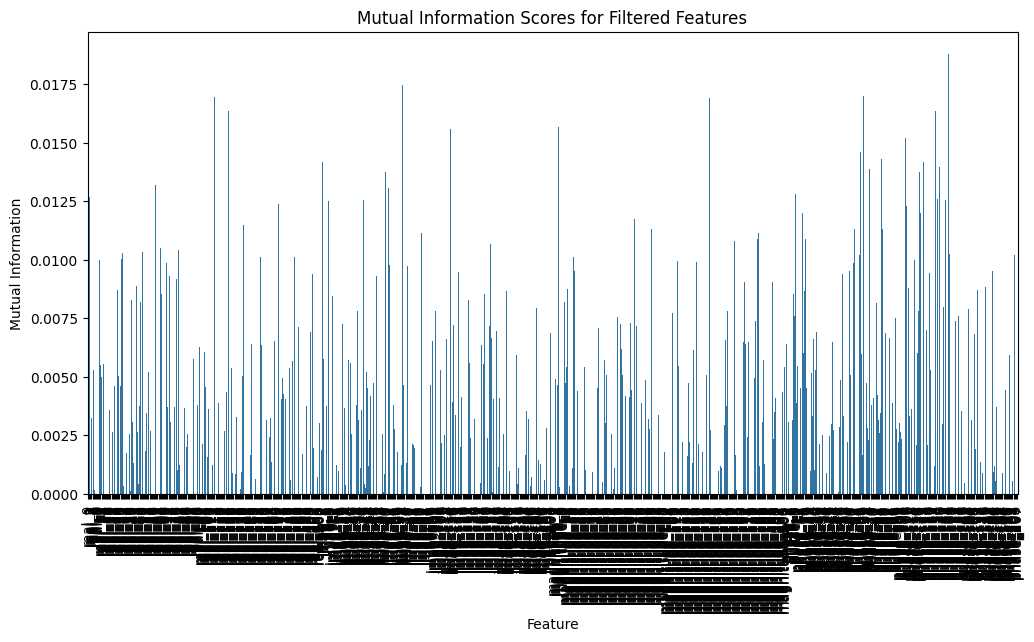

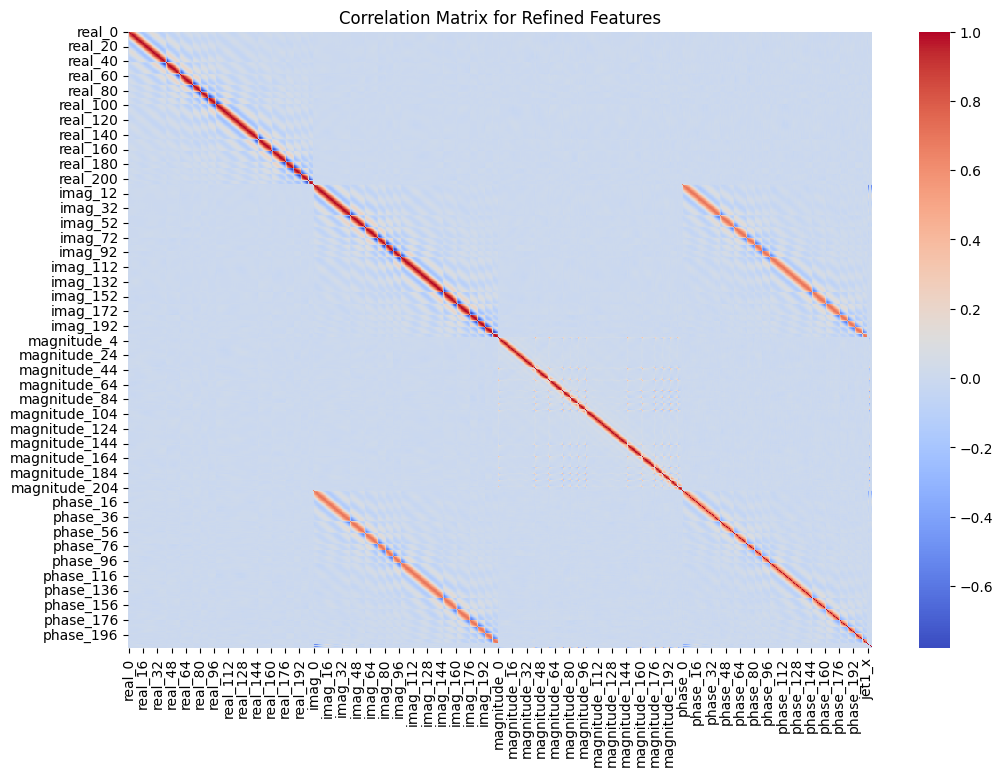

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# Load restored dataset
df = pd.read_csv("restored_dataset.csv")

# Select received signal features and jet positions
X_filtered = df.iloc[:, :-6]  # Exclude jet position columns
y_target = df[["jet1_x", "jet1_y", "jet1_z", "jet2_x", "jet2_y", "jet2_z"]]

#  Compute Mutual Information Scores
mi_scores = mutual_info_regression(X_filtered, y_target.mean(axis=1))
mi_df = pd.DataFrame({"Feature": X_filtered.columns, "Mutual Information": mi_scores})

#  Plot Mutual Information Scores
plt.figure(figsize=(12,6))
sns.barplot(x=mi_df["Feature"], y=mi_df["Mutual Information"])
plt.xticks(rotation=90)
plt.title("Mutual Information Scores for Filtered Features")
plt.show()

#  Compute Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix for Refined Features")
plt.show()


In [41]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("restored_dataset.csv")

# Select signal features
X_filtered = df.iloc[:, :-6]  # Exclude jet position columns
y_target = df[["jet1_x", "jet1_y", "jet1_z", "jet2_x", "jet2_y", "jet2_z"]]

#  Step 1: Remove Features with Low Mutual Information
mi_scores = mutual_info_regression(X_filtered, y_target.mean(axis=1))
mi_df = pd.DataFrame({"Feature": X_filtered.columns, "Mutual Information": mi_scores})
high_mi_features = mi_df[mi_df["Mutual Information"] > 0.005]["Feature"].tolist()

df_selected = df[high_mi_features + list(y_target.columns)]

#  Step 2: Apply PCA for Dimensionality Reduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected.iloc[:, :-6])  # Normalize feature space
pca = PCA(n_components=50)  # Keep top 50 components
X_pca = pca.fit_transform(X_scaled)

# Create final optimized dataset
df_final = pd.DataFrame(X_pca, columns=[f"PCA_{i+1}" for i in range(50)])
df_final[y_target.columns] = df_selected[y_target.columns]  # Add target variables

# Save optimized dataset
df_final.to_csv("optimized_dataset.csv", index=False)

print(" Dataset optimized successfully! Ready for model selection.")


 Dataset optimized successfully! Ready for model selection.


In [42]:
import pandas as pd

# Load optimized dataset
df = pd.read_csv("optimized_dataset.csv")

# Update index to start from 1
df.index = range(1, len(df) + 1)

# Save the updated file
df.to_csv("optimized_dataset_reindexed.csv", index=True)

print(" Index updated Rows now start from 1 instead of 0.")


 Index updated Rows now start from 1 instead of 0.
